## Сорокин Евгений 18-ивт-2 ## 

### Лабораторная работа № 2. Методы классификации данных

#### Цель лабораторной работы – получение навыков работы с методами классификации.

1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

7. Заполните пропущенные значения в данных;

8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Кодировка классификаторов:

1 – классификатор K ближайших соседей (задаётся количество ближайших объектов);

2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);

3 – линейный классификатор (персептрон);

4 – логический классификатор (бинарное решающее дерево).

#### Вариант 19
#### Набор данных 2
#### Классификаторы 1, 4

### 1. Изучение набора данных
##### glass.csv

Id number: 1 to 214 (removed from CSV file) __(Идентификационный номер, удалён из csv файла)__  
RI: refractive index __(показатель преломления)__  
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) __(Натрий (единица измерения: весовой процент в соответствующем оксиде)__  
Mg: Magnesium __(Магний)__  
Al: Aluminum __(Алюминий)__  
Si: Silicon __(Кремний)__  
K: Potassium __(Калий)__  
Ca: Calcium __(Кальций)__  
Ba: Barium __(Барий)__  
Fe: Iron __(Железо)__  
Type of glass: (class attribute) -- 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 6 tableware -- 7 headlamps  
__(Тип стекла: (атрибут класса) 1 - обработанные окна, 2 - необработанные окна, 3 - автомобильные обработанные окна, 4 - автомобильные неоработаные окна (нет в этой базе данных), 5 - контейнеры, 6 - посуда, 7 - фары)__


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV

sns.set(style="darkgrid")
plt.style.use('ggplot')  # Красивые графики

In [2]:
glass_df = pd.read_csv('glass.csv') # загрузил данные в объект glass_df
print(glass_df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [3]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### 2. Удаление дубликатов строк в наборе данных

In [5]:
print("Размер набора данных до удаления: " , glass_df.count().max())
if glass_df.count().max() == glass_df.drop_duplicates(keep='first').count().max():
    print("Дубликатов нет")
else:
    glass_df.drop_duplicates(keep='first', inplace = True)  #  Удаление дубликатов, кроме первого вхождения; удаление в данной таблице
    print("Размер набора данных до удаления: ", glass_df.count().max())
glass_df.shape

Размер набора данных до удаления:  213
Дубликатов нет


(213, 10)

### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

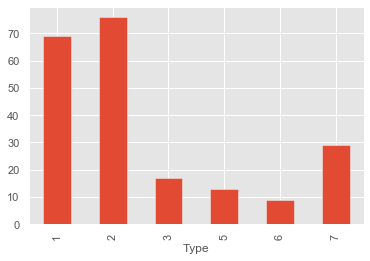

In [135]:

glass_df.groupby(["Type"])["Type"].count().plot(kind='bar') #  Гистограмма данных по классам.
#  По гистограмме видно, что больше всего животных относится ко 2 и 1 классам.

### 4.	Выполните масштабирование количественных признаков

In [136]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [137]:
glass_df['Type'] = glass_df['Type'].apply(lambda x: str(x))
# выделим категориальные и числовые признаки, заранее сделав Type категориальным
numerical_columns = [i for i in glass_df.columns if glass_df[i].dtype.name != 'object']
categorial_columns = [i for i in glass_df.columns if glass_df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
categorial:  ['Type']


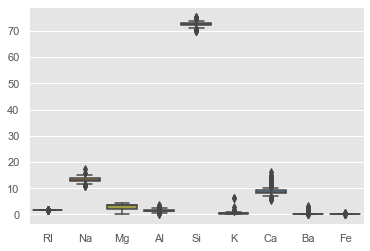

In [138]:
sns.boxplot(data=glass_df[numerical_columns]) # до масштабирования

In [139]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


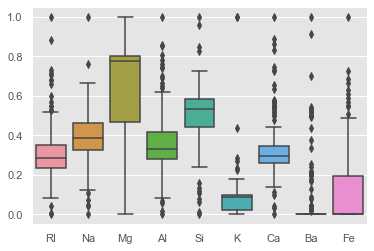

In [140]:
scaler = preprocessing.MinMaxScaler()

glass_df[numerical_columns] = scaler.fit_transform(glass_df[numerical_columns].values.astype(float))
sns.boxplot(data=glass_df[numerical_columns]) # после масштабирования

In [141]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,7
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,7
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,7
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,7


### 5. Выполните замену категориальных признаков

In [142]:
binary_columns = [i for i in categorial_columns if len(glass_df[i].unique()) == 2]
nonbinary_columns = [i for i in categorial_columns if len(glass_df[i].unique()) > 2]
print (binary_columns, nonbinary_columns)

[] ['Type']


In [143]:
# бинарых колонок нет
# для не бинарых применим dummy-кодирование
df_nonbinary = pd.get_dummies(glass_df[nonbinary_columns])
glass_df.drop(nonbinary_columns, axis=1, inplace=True)
glass_df = pd.concat([df_nonbinary, glass_df] , axis=1)

print(glass_df.shape)
glass_df.head()

(213, 15)


,Type_1,Type_2,Type_3,Type_5,Type_6,Type_7,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,0,0,0,0,0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,1,0,0,0,0,0,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,1,0,0,0,0,0,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,1,0,0,0,0,0,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,1,0,0,0,0,0,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации

          Type_1    Type_2    Type_3    Type_5    Type_6    Type_7        RI  \
Type_1  1.000000 -0.515573 -0.203864 -0.176482 -0.145395 -0.274811  0.073456   
Type_2 -0.515573  1.000000 -0.219353 -0.189890 -0.156442 -0.295690  0.066659   
Type_3 -0.203864 -0.219353  1.000000 -0.075085 -0.061859 -0.116919 -0.037396   
Type_5 -0.176482 -0.189890 -0.075085  1.000000 -0.053550 -0.101215  0.048865   
Type_6 -0.145395 -0.156442 -0.061859 -0.053550  1.000000 -0.083387 -0.061932   
Type_7 -0.274811 -0.295690 -0.116919 -0.101215 -0.083387  1.000000 -0.161582   
RI      0.073456  0.066659 -0.037396  0.048865 -0.061932 -0.161582  1.000000   
Na     -0.149383 -0.267279  0.011919 -0.180366  0.320340  0.505778 -0.198802   
Mg      0.417816  0.166981  0.176735 -0.337272 -0.200322 -0.590119 -0.127526   
Al     -0.385551 -0.062212 -0.147806  0.301124 -0.035159  0.540242 -0.400973   
Si     -0.021175 -0.055022 -0.095489 -0.095392  0.150041  0.159787 -0.539000   
K      -0.049453  0.025350 -0.041761  0.

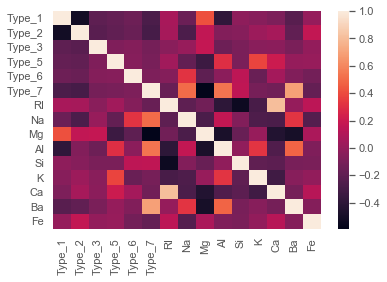

In [144]:
corr_matrix = glass_df.corr()
sns.heatmap(corr_matrix);
print(corr_matrix)

### 7. Заполните пропущенные значения в данных

In [145]:
glass_df.info() # пропущенные значения отсутствуют

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type_1  213 non-null    uint8  
 1   Type_2  213 non-null    uint8  
 2   Type_3  213 non-null    uint8  
 3   Type_5  213 non-null    uint8  
 4   Type_6  213 non-null    uint8  
 5   Type_7  213 non-null    uint8  
 6   RI      213 non-null    float64
 7   Na      213 non-null    float64
 8   Mg      213 non-null    float64
 9   Al      213 non-null    float64
 10  Si      213 non-null    float64
 11  K       213 non-null    float64
 12  Ca      213 non-null    float64
 13  Ba      213 non-null    float64
 14  Fe      213 non-null    float64
dtypes: float64(9), uint8(6)
memory usage: 17.9 KB


### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

In [146]:
glass_df

,Type_1,Type_2,Type_3,Type_5,Type_6,Type_7,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,0,0,0,0,0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,1,0,0,0,0,0,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,1,0,0,0,0,0,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,1,0,0,0,0,0,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,1,0,0,0,0,0,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,0,0,0,1,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0,0,0,0,0,1,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0,0,0,0,0,1,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0,0,0,0,0,1,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [147]:
X = glass_df.drop(('Type_6'), axis=1)  # Выбрасываем столбец 'Type_6', он будет выходным значением.
y = glass_df['Type_6']
feature_names = X.columns
print (feature_names)

Index(['Type_1', 'Type_2', 'Type_3', 'Type_5', 'Type_7', 'RI', 'Na', 'Mg',
       'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'],
      dtype='object')


In [148]:
print (X.shape) # у нас 14 входных признаков
print (y.shape)
N, d = X.shape

(213, 14)
(213,)


In [149]:
# разобьем данные на обучающую/тестовую выборки в отношении 70%:30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print ("обучающая выборка: ",N_train," тестовая выборка: " ,N_test)

обучающая выборка:  149  тестовая выборка:  64


##### К ближайших соседей

In [150]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) # обучаем на тренировочных выборках

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [151]:
y_train_predict = knn.predict(X_train) # пробуем предсказать по тренировочной выборке
y_test_predict = knn.predict(X_test) # пробуем предсказать по тестовой выборке

err_train = np.mean(y_train != y_train_predict) # считаем ошибки по тренирововчной выборке
err_test  = np.mean(y_test  != y_test_predict) # считаем ошибки по тестовой выборке
print ("ошибки по тренирововчной выборке: ",err_train,"ошибки по тестовой выборке: ", err_test)

ошибки по тренирововчной выборке:  0.0 ошибки по тестовой выборке:  0.0


In [152]:
# находим оптимальное число соседей
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print ("минимальная ошибка: ", best_cv_err, "лучшее число соседей: ", best_n_neighbors)

минимальная ошибка:  0.0 лучшее число соседей:  1


In [153]:
# пересчитываем при оптимальном числе соседей
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print ("Ошибка на тренировочной выборке: ", err_train, "ошибка натестовой выборке: ", err_test)

Ошибка на тренировочной выборке:  0.0 ошибка натестовой выборке:  0.0


##### бинарное решающее дерево

In [154]:
# Дерево
tree = DecisionTreeClassifier()
X, y = glass_df.drop('Type_6', axis=1), glass_df['Type_6']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
params = {'max_depth': list(range(1,12)), 'max_features': list(range(1,12))}

tree_grid = GridSearchCV(tree, params)
tree_grid.fit (X_train, y_train)

best_features = tree_grid.best_estimator_.max_features
best_depth = tree_grid.best_estimator_.max_depth
best_score = tree_grid.best_score_
print('лучший тренировочный результат:', best_score, 
      '\t лучшее количество признаков:', best_features,
      '\t глубина:', best_depth)

tree = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
tree.fit(X_train, y_train)
best_score  = np.mean(y_test == tree.predict(X_test))
print('лучший результат: ', best_score)

лучший тренировочный результат: 1.0 	 лучшее количество признаков: 1 	 глубина: 9
лучший результат:  0.875


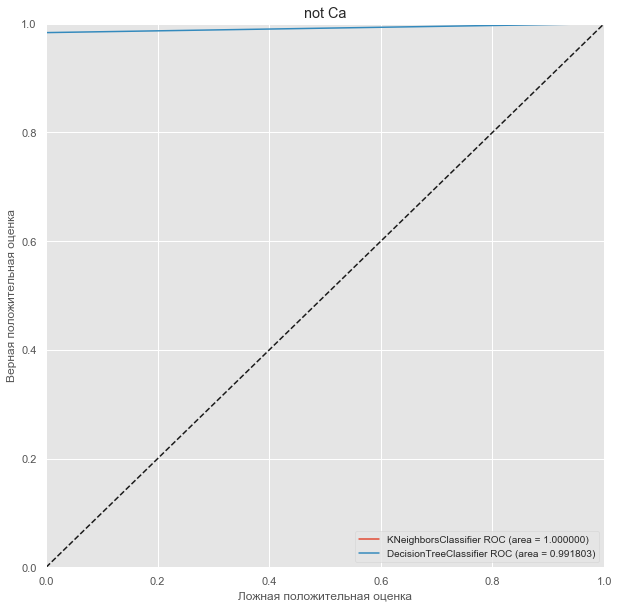

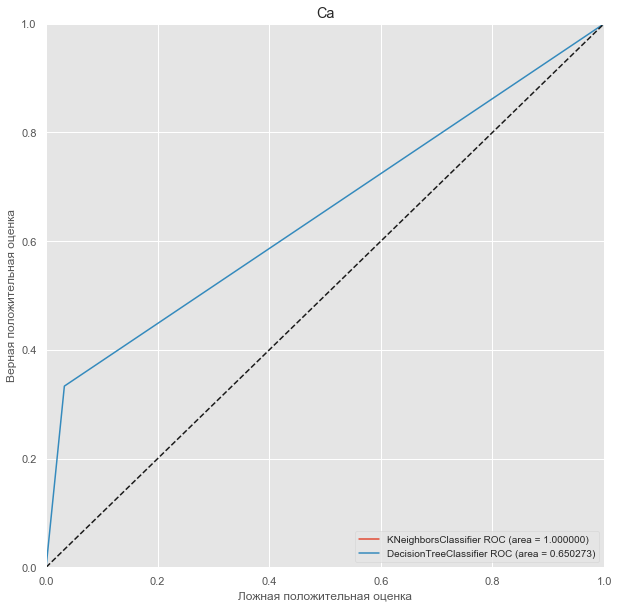

In [157]:
plt.figure(figsize = (10,10))

# K соседей

knn = KNeighborsClassifier ( n_neighbors = best_num)
proba0 = knn.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, proba0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

# бинарное решающее дерево

tree = DecisionTreeClassifier(max_depth = best_depth, max_features = best_features)
proba_tree0 = tree.fit(X_train, y_train).predict_proba (X_test)
tpr, fpr, thresholds = roc_curve(y_test, proba_tree0[:,0])
roc_auc  = auc (fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

# настраиваем график

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Ложная положительная оценка')
plt.ylabel('Верная положительная оценка')
plt.legend(loc=4, fontsize='medium')
plt.title('not Ca')
plt.show()


plt.figure(figsize=(10,10))

# K соседей

knn = KNeighborsClassifier( n_neighbors = best_num)
proba1 = knn.fit(X_train, y_train).predict_proba (X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('KNeighborsClassifier', roc_auc)) 

# бинарное решающее дерево

tree = DecisionTreeClassifier(max_depth = best_depth, max_features = best_features)
proba_tree1 = tree.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba_tree1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   

# настраиваем график

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Ложная положительная оценка')
plt.ylabel('Верная положительная оценка')
plt.legend(loc=4, fontsize='medium')
plt.title('Ca')
plt.show()

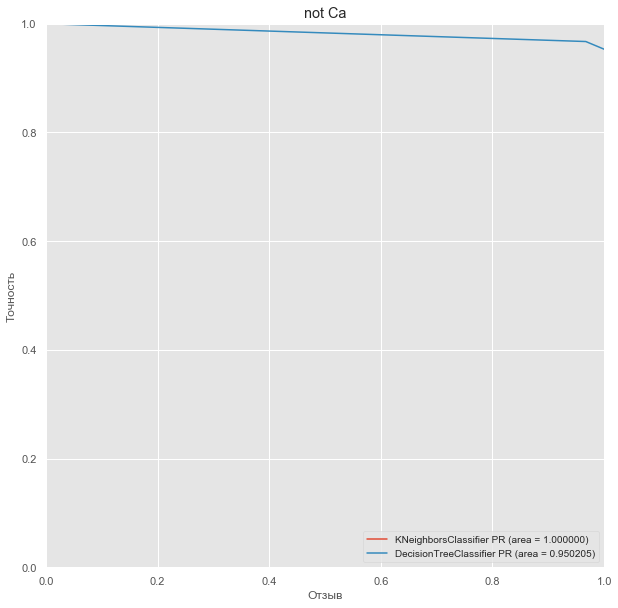

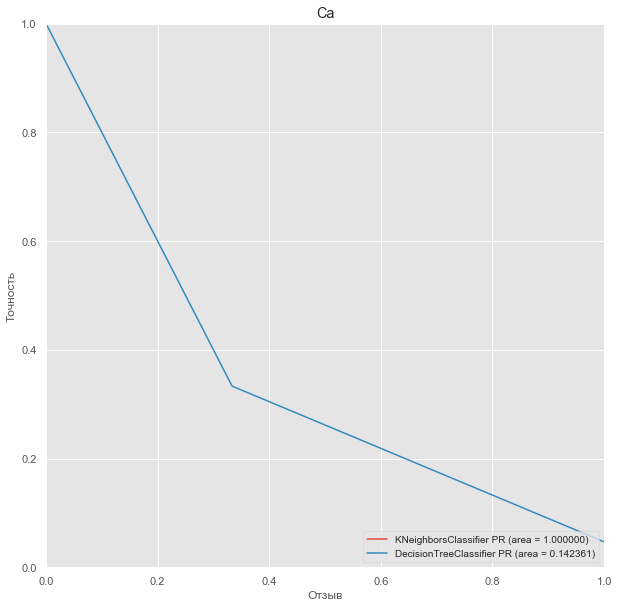

In [158]:
plt.figure(figsize=(10,10))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)

# K соседей

precision, recall, thresholds = precision_recall_curve(y_test_invers, proba1[:,0])
aps_knn1 = average_precision_score(y_test_invers,proba1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn1)) 

# бинарное решающее дерево

precision, recall, thresholds = precision_recall_curve(y_test_invers, proba_tree1[:,0])
aps_dtc1 = average_precision_score(y_test_invers,probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

# настраиваем график

plt.xlabel('Отзыв')
plt.ylabel('Точность')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('not Ca')
plt.show()


plt.figure(figsize=(10,10))

# K соседей

precision, recall, thresholds = precision_recall_curve(y_test, proba0[:,1])
aps_knn0 = average_precision_score(y_test,proba0[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('KNeighborsClassifier', aps_knn0)) 

# бинарное решающее дерево

precision, recall, thresholds = precision_recall_curve(y_test, proba_tree1[:,1])
aps_dtc1 = average_precision_score(y_test,proba_tree1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 

# настраиваем график

plt.xlabel('Отзыв')
plt.ylabel('Точность')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('Ca')
plt.show()

### Вывод:
#### Классификаторы бинарное решающее дерево и k ближайших соседей работают неправильно , так как мало данных и они не сбалансированы.